___
# Python Data Reference

Collection of python manipulation and visualization examples
___

## Import Libraries

In [1]:
## remove this, this is for my personal pc setup
import sys; import os; sys.path.append(os.path.expanduser('~/DropBox/my/projects/T/'))

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas   as pd
import operator as op

import numpy             as np
import seaborn           as sns
from datetime import datetime

import pyscope
from pyscope import read_ss

from IPython.display import IFrame

from T import * # want T to be accessible


%load_ext autoreload
%autoreload

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Data

Example of transforming an sklearn data set into a data frame

In [3]:
from sklearn import datasets

In [4]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df = sklearn_to_df(datasets.load_boston())

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


But we will actually use mostly titanic dataset that we can find around the web:

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/antonfefilov/titanic/master/input/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Table Manipulation

See https://github.com/al3xandr3/Data-Science-ipynb/blob/master/T.ipynb

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Selections

In [10]:
df.query("Age > 75")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


In [11]:
df.query('(Age >= 75) & (Survived >= 0)')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


### Unique Values

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
df['Embarked'].nunique() # count of unique values

3

### Sorting

In [14]:
df.sort_values('Age', ascending = False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


### Aggregations

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
df.groupby(['Pclass', 'Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [17]:
df['Age'].min()

0.42

In [18]:
df['Age'].max()

80.0

In [19]:
df['Age'].mean()

29.69911764705882

In [20]:
df['Age'].median()

28.0

In [21]:
mean_age_by_survived = df.groupby('Survived')['Age'].mean()
mean_age_by_survived

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [22]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

### Merge

In [23]:
df1 = mean_age_by_survived.round(0).reset_index()
df2 = std_age_by_survived.round(0).reset_index()

df3 = pd.merge(df1, df2, on='Survived')

df3.columns = ['TAX', 'Average Age', 'Age Standard Deviation']

df3

,TAX,Average Age,Age Standard Deviation
0,0,31.0,14.0
1,1,28.0,15.0


### Pivot Tables

In [24]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Correlations

In [25]:
df['IsFemale'] = df['Sex'] == 'female'

In [26]:
correlated_with_survived = df.corr()['Survived'].sort_values()
correlated_with_survived

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
IsFemale       0.543351
Survived       1.000000
Name: Survived, dtype: float64

## Plotting

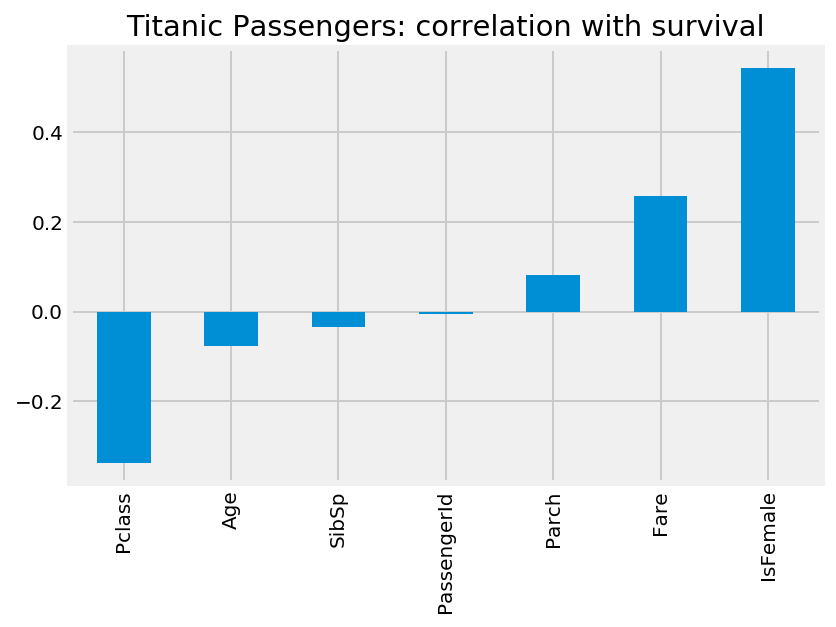

In [27]:
correlated_with_survived.iloc[:-1].plot(kind='bar',
                                        title='Titanic Passengers: correlation with survival')

In [28]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [29]:
data = np.vstack([data1, data2, data3, data4]).transpose()

In [30]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

,data1,data2,data3,data4
0,0.044522,0.779952,2.095933,2.838326
1,-0.045889,0.458906,2.761836,3.408740
2,-0.000151,1.389760,2.106428,3.054320
3,-0.010561,0.829275,2.140398,3.253979
4,0.035655,1.462628,2.371587,2.924427


### Line Plot

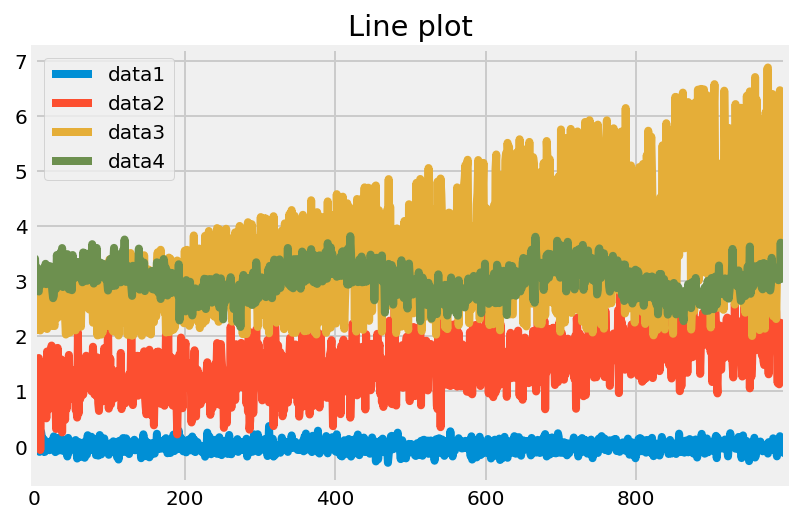

In [31]:
df.plot(title='Line plot')

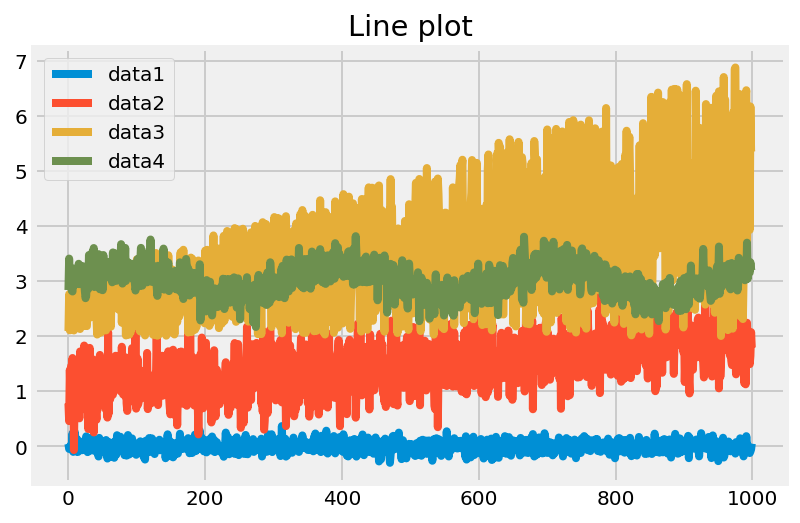

In [32]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

### Scatter Plot

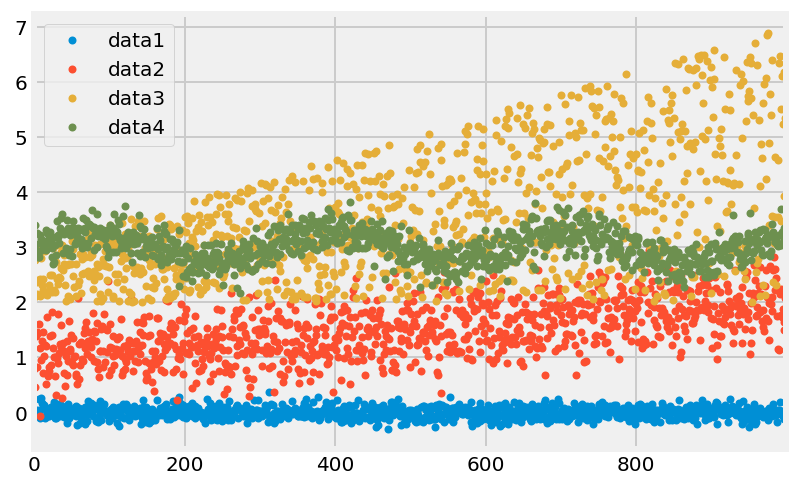

In [33]:
df.plot(style='.')

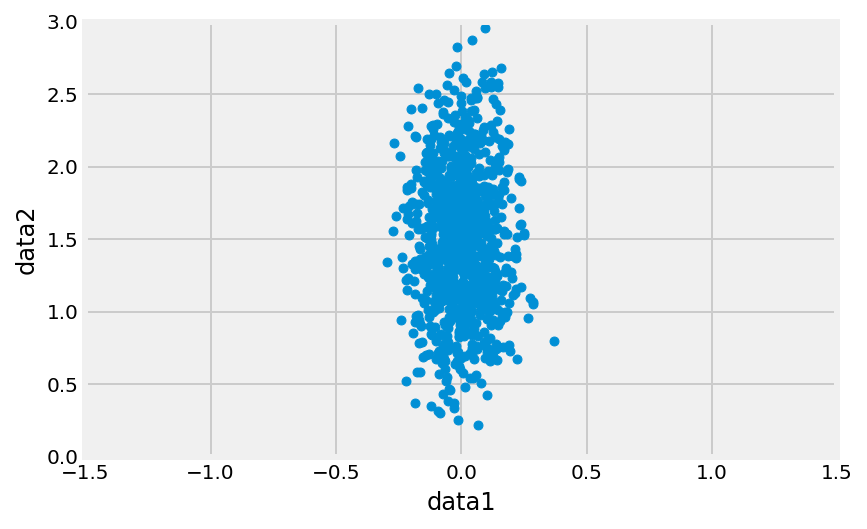

In [34]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

### Histograms

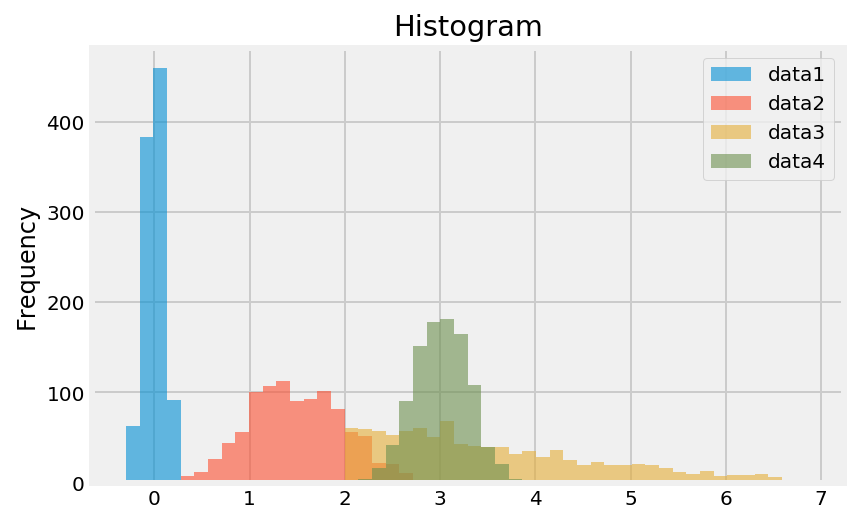

In [35]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)

### Cumulative distribution

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


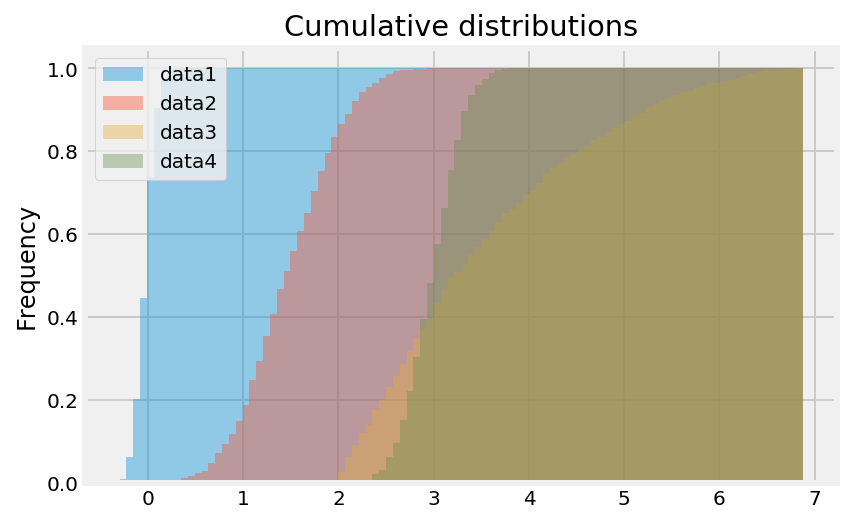

In [36]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        normed=True,
        cumulative=True,
        alpha=0.4)

### Box Plot

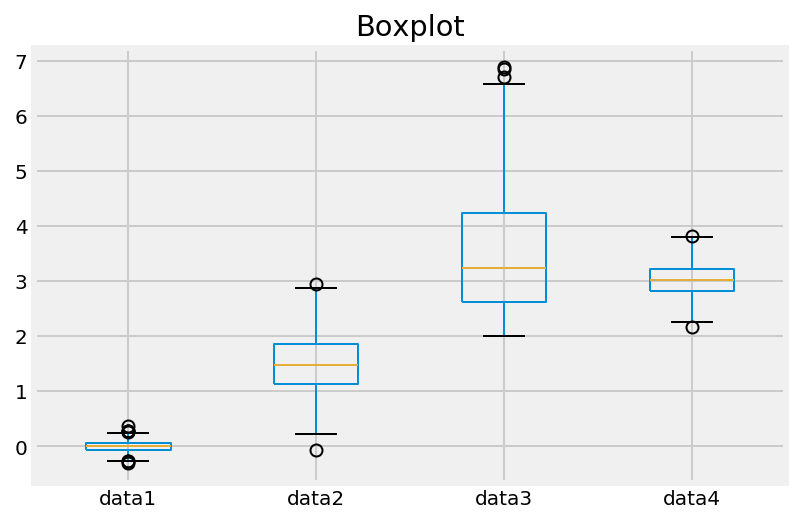

In [37]:
df.plot(kind='box',
        title='Boxplot')

### Subplots

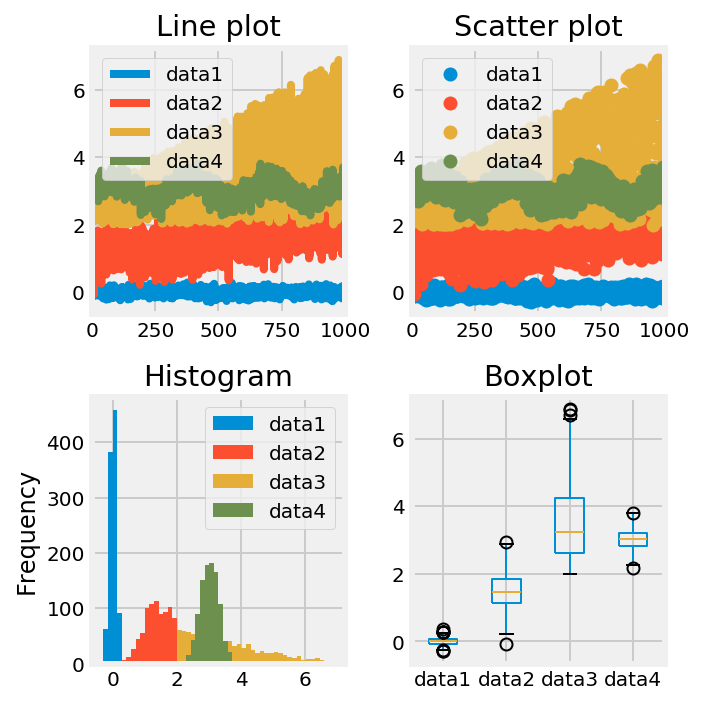

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot')

plt.tight_layout()

### Pie charts

In [39]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    836
True     164
Name: data1, dtype: int64

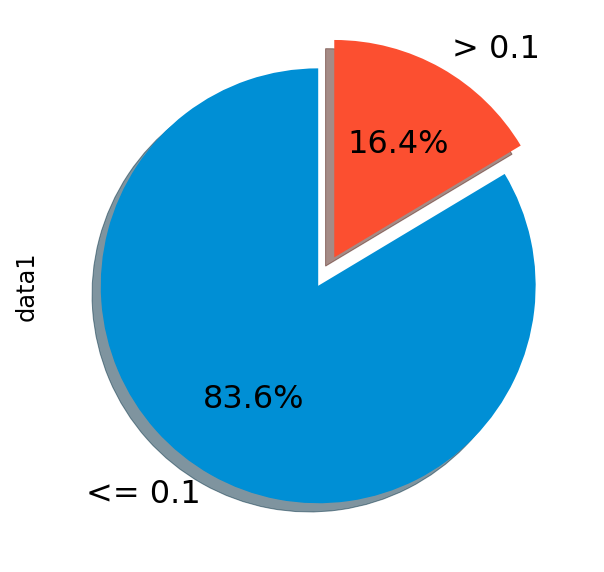

In [40]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

### Hexbin plot

In [41]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])

In [42]:
df.head()

,x,y
0,-2.245771,-1.422713
1,-0.781794,-1.279628
2,-1.570317,-1.085366
3,0.160713,-1.190250
4,-0.420246,4.792133


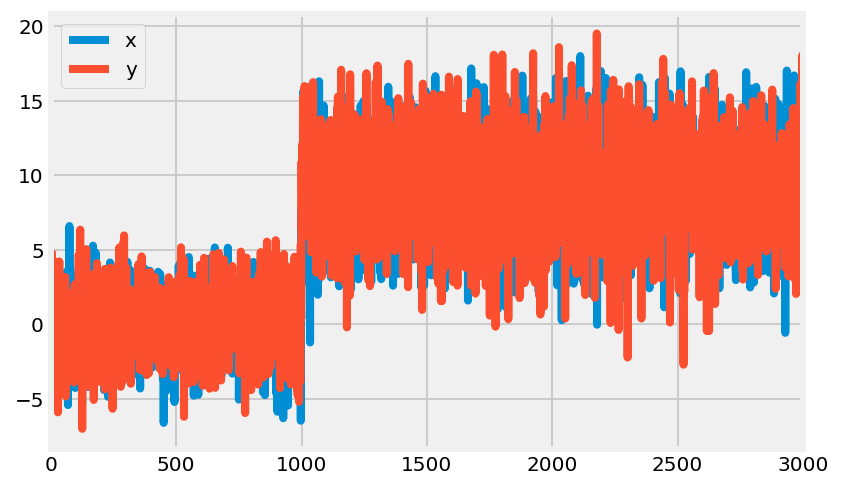

In [43]:
df.plot()

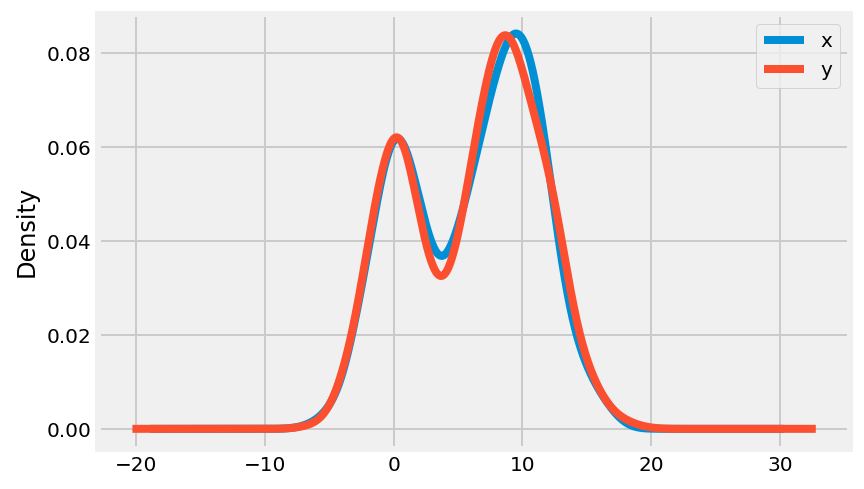

In [44]:
df.plot(kind='kde')

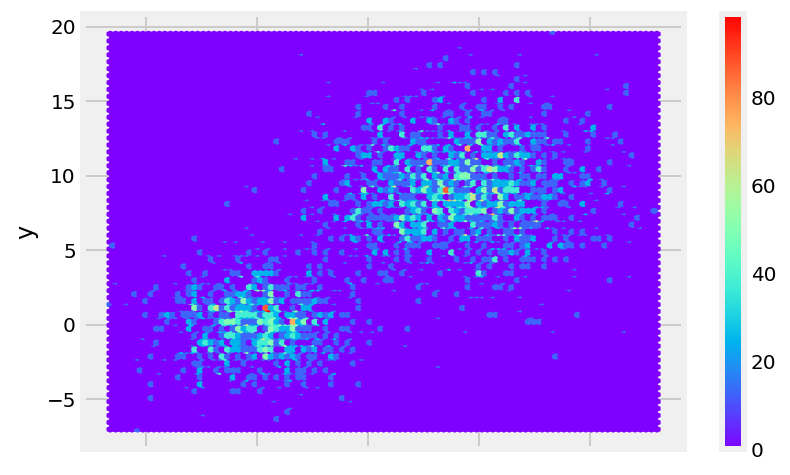

In [45]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')

## Unstructured data

### Images

In [46]:
from PIL import Image
import requests
from io import BytesIO

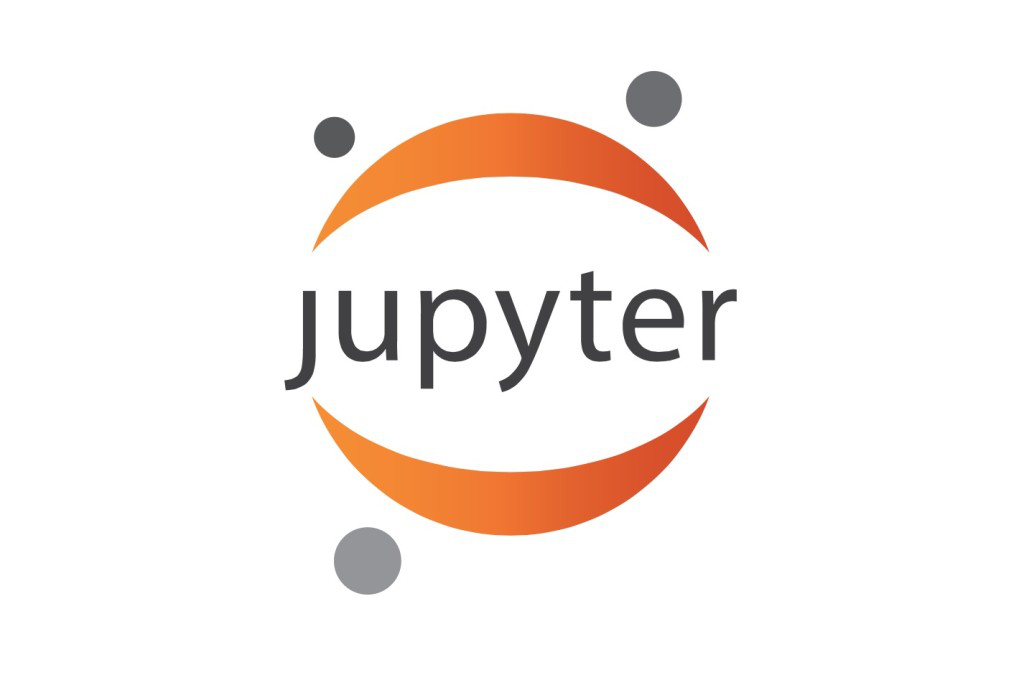

In [47]:
response = requests.get('https://jrogel.com/wp-content/uploads/2015/08/Jupyter-1024x688.jpg')
img = Image.open(BytesIO(response.content))
#img = Image.open()
img

In [48]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [49]:
imgarray = np.asarray(img)

In [50]:
type(imgarray)

numpy.ndarray

In [51]:
imgarray.shape

(688, 1024, 3)

In [52]:
imgarray.ravel().shape

(2113536,)

## Other

### Decile Aggregation

To calculate an index:
1. Sort by value (and reset the index)
2. Run the qcut to split into 10 equal splits

In [76]:
df2 = T(np.random.normal(10, size=(1000,1)), columns=["value"])
df2['user'] = df2.index
df2.head()

,value,user
0,10.126135,0
1,10.462001,1
2,9.175545,2
3,10.171184,3
4,10.383671,4


In [77]:
# sort by percentage
df2_dec = T(df2).sort("value")

# reset index
df2_dec = df2_dec.reset_index(drop=True)

# build decile
df2_dec['decile'] = pd.qcut(df2_dec.index, 10, labels=False)

df2_dec.head()

,value,user,decile
0,6.836301,153,0
1,6.962172,363,0
2,7.408764,208,0
3,7.639099,683,0
4,7.668825,742,0


A column was added into the data frame with the id of the decile
Next, we do a group by decile

In [78]:
# Separate before and after period and calculate metric for each user for A, B, C, D
def decile_agg(df):
    names = {
          'Users':        len(np.unique( df['user']  ))         
        
         ,'min value':     np.min(    T(df).column("value")   )
         ,'max value':     np.max(    T(df).column("value")   )
         ,'avg value':     np.mean(   T(df).column("value")   )
         ,'median value':  np.median( T(df).column("value")   )
    }
    return pd.Series(names, index=names.keys())

In [79]:
df2_dec_agg = T(df2_dec).groupby('decile').apply(decile_agg).reset_index()
df2_dec_agg['Users pct.'] =  df2_dec_agg['Users'] / np.sum(df2_dec_agg['Users'])
df2_dec_agg

,decile,Users,min value,max value,avg value,median value,Users pct.
0,0,100.0,6.836301,8.818233,8.323345,8.362050,0.1
1,1,100.0,8.822675,9.188709,9.030822,9.037051,0.1
2,2,100.0,9.191338,9.489171,9.350570,9.352884,0.1
3,3,100.0,9.493779,9.709810,9.605308,9.606950,0.1
4,4,100.0,9.713133,9.963305,9.842192,9.839534,0.1
5,5,100.0,9.966730,10.190092,10.079773,10.080813,0.1
6,6,100.0,10.192753,10.445693,10.319048,10.316447,0.1
7,7,100.0,10.446237,10.697833,10.575970,10.580735,0.1
8,8,100.0,10.702114,11.122366,10.899893,10.886931,0.1
9,9,100.0,11.126492,12.880537,11.611654,11.519045,0.1


Text(0, 0.5, 'Avg. value')

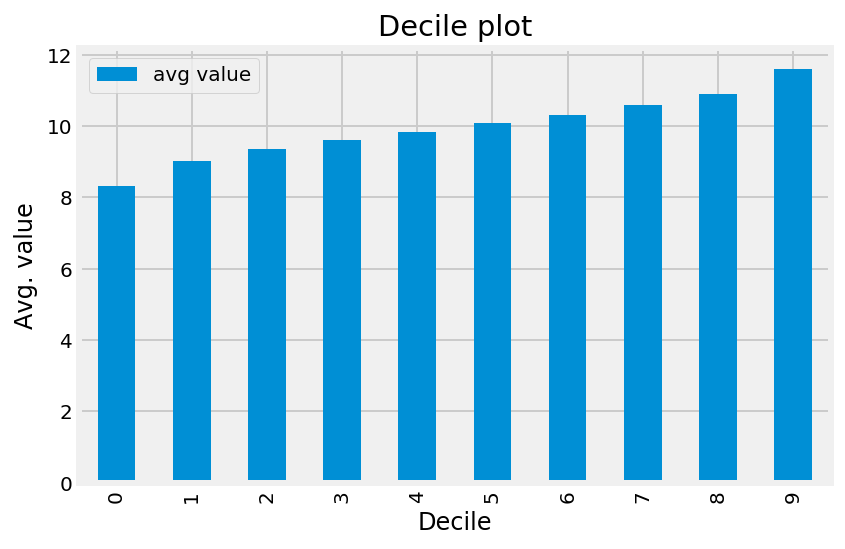

In [80]:
T(df2_dec_agg).select("decile", "avg value").plot.bar(x="decile", y="avg value")
plt.title('Decile plot')
plt.xlabel('Decile')
plt.ylabel('Avg. value')